In [1]:
import os
import MDAnalysis as md
import MDAnalysis.analysis.rms
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from MDAnalysis.analysis.base import (AnalysisBase, AnalysisFromFunction, analysis_class)
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [2]:
energy_means = []

# For all energy levels ...
for energy in ['300ev', '600ev', '2000ev']:
    print(energy)
    conformation_means = []
    conformation_stds = []

    # and all mutants ...
    for conformation in ['ubiWT', 'ubi6', 'ubi20', 'ubi35', 'ubi48']:
        print(conformation)
        file_name = f"/home/simon/results/last_frame/{energy}/ubiWT_static/sim1/simulation_output/mean_charge_vs_time.txt"
        times = []

        # load the mean charge data and append the time
        with open(file_name, 'r') as file:
                line = file.readlines()
                for i in line:
                    times.append(float(i[0:8]))
        all_charges = []

        # Open the mean charge data for all simulations and append the mean charges
        for simulation in range(1, 101):
            file_name = f"/home/simon/results/last_frame/{energy}/{conformation}_static/sim{simulation}/simulation_output/mean_charge_vs_time.txt"
            charges = []
            with open(file_name, 'r') as file:
                line = file.readlines()
                for i in line:
                    charges.append(float(i[9:-1]))
            all_charges.append(charges)
        
        conformation_means.append(np.mean(all_charges, axis=0))
    energy_means.append(np.mean(conformation_means, axis=0))

300ev
ubiWT
ubi6
ubi20
ubi35
ubi48
600ev
ubiWT
ubi6
ubi20
ubi35
ubi48
2000ev
ubiWT
ubi6
ubi20
ubi35
ubi48


In [3]:
# Calculate the charge of the last frame (will be used for the horizontal lines)
last_charge = [charge[-1] for charge in energy_means]

In [4]:
# Define the pulse parameters
pulse_peak = 0.030
pulse_width = 30 / (2 * math.sqrt(2 * math.log(2))) * 0.001

# And the values of the pulse
pulse_value = norm.pdf(times, pulse_peak, pulse_width)

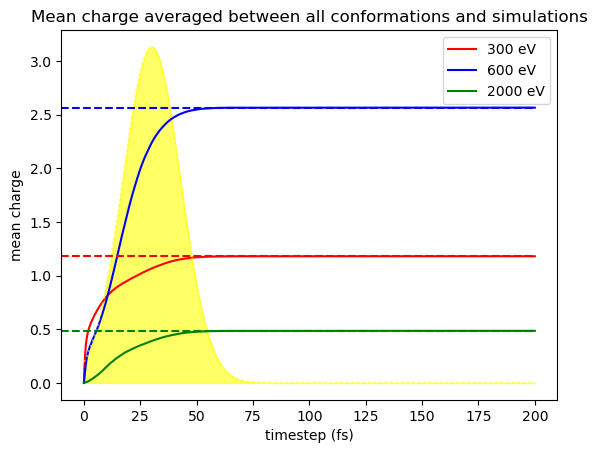

In [5]:
# Now we aplot the mean charges ...
fig, ax = plt.subplots()
femtoseconds = [x * 1000 for x in times]
for i, clr in enumerate(['red', 'blue', 'green']):
    ax.plot(femtoseconds, energy_means[i], color=clr)

# and the pulse (for vizualisation purposes)
ax.plot(femtoseconds, pulse_value*0.1, color='yellow', alpha=0.6, linestyle='dotted')
ax.fill_between(femtoseconds, pulse_value*0.1, color='yellow', alpha = 0.6)
ax.legend(['300 eV', '600 eV', '2000 eV'], loc='upper right')
plt.title('Mean charge averaged between all conformations and simulations')
plt.xlabel('timestep (fs)')
plt.ylabel('mean charge')
for i, clr in enumerate(['red', 'blue', 'green']):
    ax.axhline(last_charge[i], xmax=0.95, color=clr, linestyle='dashed')